In [31]:
!python --version
#!pip install pandas-datareader
#!pip install yfinance
#!pip install matplotlib
#!pip install seaborn 

Python 3.9.5
     |████████████████████████████████| 285 kB 2.1 MB/s eta 0:00:01


### Let's load the ticker data for 5 differet market segments and NIFTY50
- Banking
- Realty
- IT
- Pharma
- FMCG

In [2]:
#!python3 -m pip install pandas_datareader

In [3]:
a = [1,2,3,4,5]
print(a[0])

1


In [40]:

from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import numpy as np
import seaborn as sn
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

2021-07-18 22:48:27.402058: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-18 22:48:27.402092: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:



yf.pdr_override()
import pandas as pd
# Tickers list
# We can add and delete any ticker from the list to get desired ticker live data
#ticker_list=['ONGC.NS','COALINDIA.NS','GRASIM.NS','DIVISLAB.NS','IOC.NS','SUNPHARMA.NS','DRREDDY.NS','BPCL.NS','WIPRO.NS','CIPLA.NS','SBILIFE.NS','POWERGRID.NS','BAJAJ-AUTO.NS','TATACONSUM.NS','INDUSINDBK.NS','TATASTEEL.NS','INFY.NS','NTPC.NS','BAJFINANCE.NS','BRITANNIA.NS','ITC.NS','BHARTIARTL.NS','HCLTECH.NS','AXISBANK.NS','NESTLEIND.NS','TITAN.NS','LT.NS','RELIANCE.NS','BAJAJFINSV.NS','HEROMOTOCO.NS','UPL.NS','HDFCLIFE.NS','EICHERMOT.NS','JSWSTEEL.NS','TECHM.NS','SHREECEM.NS','MARUTI.NS','SBIN.NS','ULTRACEMCO.NS','HINDALCO.NS','HINDUNILVR.NS','TCS.NS','ADANIPORTS.NS','M&M.NS','TATAMOTORS.NS','ASIANPAINT.NS','KOTAKBANK.NS','ICICIBANK.NS','HDFCBANK.NS','HDFC.NS']
ticker_list = ['^NSEBANK','^CNXREALTY','^CNXIT','^CNXPHARMA','^CNXFMCG','^NSEI']
today = date.today()
# We can get data by our choice by giving days bracket
start_date= '2019–10–01'
end_date="2021–05-02"
files=[]
outdir = './ticker_data'
covid_outdir = './covid_case_data'
if not os.path.exists(outdir):
    os.mkdir(outdir)
if not os.path.exists(covid_outdir):
    os.mkdir(covid_outdir)
    
def get_historic_dates(start_n_days,end_n_days):
    for n in range(start_n_days,end_n_days):
        yield today  + timedelta(days=-n)

def read_n_files(n,from_dir):
    all_files = glob.glob(from_dir + "/*.csv")
    ll = []
    if(len(all_files) > n):
        print('More files') 
        for i in range(0,n):
           
            df = pd.read_csv(all_files[i], index_col=None, header=0)
            ll.append(df)
    else:
        print('Less files')
        for filename in all_files:
            
            df = pd.read_csv(filename, index_col=None, header=0)
            ll.append(df)
    df1 = pd.concat(ll, axis=0, ignore_index=True)
    print(df1.head())
    
    return df1
    
#read_n_files(7,outdir)

In [6]:
str

str

In [20]:
data = pdr.get_data_yahoo('^NSEI', start=(today + timedelta(days=-2)), end=today + timedelta(days=-1))
data = data.reset_index()
data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-16,15958.349609,15962.25,15882.599609,15923.400391,15923.400391,276300


In [23]:
from datetime import date, timedelta

def getData(ticker):
    print(ticker)
    data = pdr.get_data_yahoo(ticker, start=(today + timedelta(days=-550)), end=today + timedelta(days=-1))
    data =  data.reset_index()
    dataname = ticker +'_'+str(today)
    files.append(dataname)
    SaveData(data,outdir, dataname)


# Create a data folder in your current dir.
def SaveData(df,writedir, filename):
    df.to_csv(writedir+'/'+filename +'.csv',index=False)



In [24]:
# This loop will iterate over ticker list, will pass one ticker to get data, and save that data as file.
for tik in ticker_list:
    getData(tik)

^NSEBANK
[*********************100%***********************]  1 of 1 completed
^CNXREALTY
[*********************100%***********************]  1 of 1 completed
^CNXIT
[*********************100%***********************]  1 of 1 completed
^CNXPHARMA
[*********************100%***********************]  1 of 1 completed
^CNXFMCG
[*********************100%***********************]  1 of 1 completed
^NSEI
[*********************100%***********************]  1 of 1 completed


### Let's now load the covid cases data for India

In [9]:
header =  ['FIPS','Admin2','Province_State','Country_Region','Last_Update','Lat','Long_','Confirmed','Deaths','Recovered','Active','Combined_Key']

filen = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-21-2020.csv'

df = pd.read_csv(filen)

#df.col
df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-21T10:13:08,67800,3139,58946,30.9756,112.2707
1,NaN,Italy,2020-03-21T17:43:03,53578,4825,6072,41.8719,12.5674
2,NaN,Spain,2020-03-21T13:13:30,25374,1375,2125,40.4637,-3.7492
3,NaN,Germany,2020-03-21T20:43:02,22213,84,233,51.1657,10.4515
4,NaN,Iran,2020-03-21T11:13:12,20610,1556,7635,32.4279,53.6880


In [10]:
from datetime import timedelta,date
today = date.today()



import pandas as pd

ll = []
jl = set()

for d in get_historic_dates(2,500):
    str1 = d.strftime('%m-%d-%Y')
    print(str1)
    filename = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+str1+'.csv'
    print(filename)
    df = pd.read_csv(filename)
    ll.append(df)
        
    jl.update(set(df.columns))
    #df = pd.read_csv(filename,header=[1])
    cols = df.columns
    print(cols)
    
            
    if 'Country_Region' in cols:
        print('In country_regions')
        f = df[df['Country_Region']=='India']
    else:
        print('In country/regions')
        f = df[df['Country/Region']=='India']
        f['Country_Region'] = f['Country/Region']
        f.drop(['Country/Region'],inplace=True,axis=1)
        
        
    if 'Province/State' in cols:
        f['Province_State'] = f['Province/State']
        f.drop(['Province/State'],inplace=True,axis=1)
    
    if 'Case-Fatality_Ratio' in cols:
        f['Case_Fatality_Ratio'] = f['Case-Fatality_Ratio']
        f.drop(['Case-Fatality_Ratio'],inplace=True,axis=1)
    
    if 'Incidence_Rate' in cols:
        f['Incident_Rate'] = f['Incidence_Rate']
        f.drop(['Incidence_Rate'],inplace=True,axis=1)
    
    if ( ('Incident_Rate' not in cols) and ('Incidence_Rate' not in cols)) :
        f['Incident_Rate'] = 0
        
    if (('Case-Fatality_Ratio' not in cols) and ('Case_Fatality_Ratio' not in cols)) :
        f['Case_Fatality_Ratio'] = 0
        
    f = f[['Country_Region','Province_State','Incident_Rate','Case_Fatality_Ratio','Deaths','Recovered', 'Confirmed']]
        
    f['record_date'] = d
    SaveData(f,covid_outdir,str1)

    
print(jl)    

07-16-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-16-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
07-15-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-15-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
07-14-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-14-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'La

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
06-24-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-24-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
06-23-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-23-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
06-02-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-02-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
06-01-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-01-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
05-11-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-11-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
05-10-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-10-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
04-19-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-19-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
04-18-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-18-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
03-28-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-28-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
03-27-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-27-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
03-06-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-06-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
03-05-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-05-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
02-12-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-12-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
02-11-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-11-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
01-21-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-21-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
01-20-2021
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-20-2021.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
12-30-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/12-30-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
12-29-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/12-29-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
12-08-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/12-08-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
12-07-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/12-07-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
11-16-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/11-16-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')
In country_regions
11-15-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/11-15-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='ob

/home/amit/anaconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/amit/anaconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
11-06-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/11-06-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
11-05-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/11-05-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
10-15-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-15-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
10-14-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-14-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
09-23-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-23-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
09-22-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-22-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
09-01-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-01-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
08-31-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-31-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
08-10-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-10-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
08-09-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-09-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
07-19-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-19-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
07-18-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-18-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
06-27-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-27-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
06-26-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-26-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
06-05-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-05-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')
In country_regions
06-04-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-04-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype=

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
05-13-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-13-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
05-12-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-12-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
05-11-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
04-19-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-19-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
04-18-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-18-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
04-17-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
03-26-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-26-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
03-25-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-25-2020.csv
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
In country_regions
03-24-2020
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data

In [17]:
df = pd.read_csv('./ticker_data/^NSEBANK_2021-07-18.csv')
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,31692.849609,31850.349609,31465.849609,31718.349609,31718.349609,0
1,31832.750000,31916.800781,31734.500000,31875.949219,31875.949219,0
2,31981.699219,32157.050781,31905.900391,32122.949219,32122.949219,498300
3,32074.150391,32086.949219,31770.800781,31946.099609,31946.099609,0
4,32008.300781,32024.099609,31720.599609,31871.449219,31871.449219,0


Text(0.5, 1.0, 'NIFTY50 Autocorrelation plot with lag= 3')

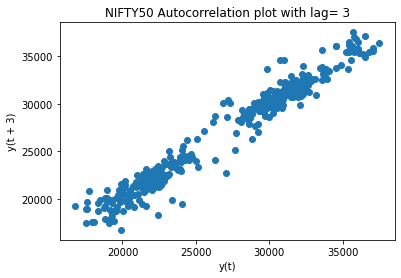

In [13]:
plt.figure()
lag_plot(df['Open'],lag=3)
plt.title('NIFTY50 Autocorrelation plot with lag= 3')

In [14]:
len(df['Close'])

403

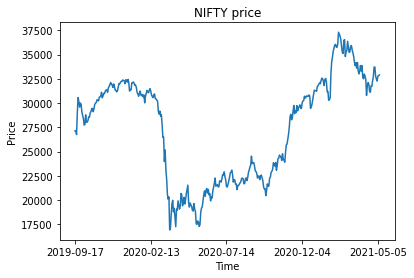

In [15]:
plt.plot(df['Date'],df['Close'])
plt.xticks(np.arange(0,500,100),df['Date'][0:500:100])
plt.title('NIFTY price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [16]:
covid_df = read_n_files(500,covid_outdir)
covid_df.head()

More files
  Country_Region  Incident_Rate Case_Fatality_Ratio   Deaths  Recovered  \
0          India    1658.609808            1.575828    109.0     6591.0   
1          India    3049.078933            0.640744  10531.0  1446244.0   
2          India    1644.106369            0.422153    109.0    22019.0   
3          India    1102.517960            0.786603   3088.0   334418.0   
4          India     561.616519            0.705239   4943.0   667506.0   

   Confirmed record_date  Unnamed: 0  
0       6917  2021-05-27         NaN  
1    1643557  2021-05-27         NaN  
2      25820  2021-05-27         NaN  
3     392574  2021-05-27         NaN  
4     700897  2021-05-27         NaN  


,Country_Region,Incident_Rate,Case_Fatality_Ratio,Deaths,Recovered,Confirmed,record_date,Unnamed: 0
0,India,1658.609808,1.575828,109.0,6591.0,6917,2021-05-27,NaN
1,India,3049.078933,0.640744,10531.0,1446244.0,1643557,2021-05-27,NaN
2,India,1644.106369,0.422153,109.0,22019.0,25820,2021-05-27,NaN
3,India,1102.517960,0.786603,3088.0,334418.0,392574,2021-05-27,NaN
4,India,561.616519,0.705239,4943.0,667506.0,700897,2021-05-27,NaN


In [22]:
covid_df.columns

Index(['Unnamed: 0', 'Country_Region', 'Incident_Rate', 'Case_Fatality_Ratio',
       'Deaths', 'Recovered', 'Confirmed', 'record_date'],
      dtype='object')

In [23]:
covid_sum = covid_df.groupby(['record_date']).sum().reset_index()

In [24]:
covid_sum.head(150)

,record_date,Unnamed: 0,Incident_Rate,Deaths,Recovered,Confirmed
0,2020-02-01,54,0.000000,0.0,0.0,1
1,2020-02-02,47,0.000000,0.0,0.0,2
2,2020-02-03,45,0.000000,0.0,0.0,3
3,2020-02-04,45,0.000000,0.0,0.0,3
4,2020-02-05,45,0.000000,0.0,0.0,3
...,...,...,...,...,...,...
145,2020-06-25,120580,1614.381385,15301.0,285637.0,490401
146,2020-06-26,120616,1667.250626,15685.0,295881.0,508953
147,2020-06-27,120652,1731.077617,16095.0,309713.0,528859
148,2020-06-28,120652,1782.501092,16475.0,321723.0,548318


In [25]:
covid_sum.drop(['Unnamed: 0'],axis=1,inplace=True)

In [26]:
covid_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   record_date    468 non-null    object 
 1   Incident_Rate  468 non-null    float64
 2   Deaths         468 non-null    float64
 3   Recovered      468 non-null    float64
 4   Confirmed      468 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 18.4+ KB


In [28]:
!mkdir clean_covid

In [31]:
SaveData(covid_sum,'./clean_covid','clean_covid')

In [25]:
covid_df = pd.read_csv('./clean_covid/clean_covid.csv', index_col=None, header=0)
covid_df.head()

,record_date,Incident_Rate,Deaths,Recovered,Confirmed
0,2020-02-01,0.0,0.0,0.0,1
1,2020-02-02,0.0,0.0,0.0,2
2,2020-02-03,0.0,0.0,0.0,3
3,2020-02-05,0.0,0.0,0.0,3
4,2020-02-06,0.0,0.0,0.0,3


In [26]:
stock_df = pd.read_csv('./ticker_data/^NSEI_2021-07-18.csv', index_col=None, header=0)
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-15,12349.400391,12355.150391,12278.750000,12343.299805,12343.299805,684400
1,2020-01-16,12347.099609,12389.049805,12315.799805,12355.500000,12355.500000,395700
2,2020-01-17,12328.400391,12385.450195,12321.400391,12352.349609,12352.349609,502100
3,2020-01-20,12430.500000,12430.500000,12216.900391,12224.549805,12224.549805,491600
4,2020-01-21,12195.299805,12230.049805,12162.299805,12169.849609,12169.849609,400


In [28]:
data = pd.merge(stock_df,covid_df,left_on='Date',right_on='record_date')
data.head(50)

,Date,Open,High,Low,Close,Adj Close,Volume,record_date,Incident_Rate,Deaths,Recovered,Confirmed
0,2020-02-03,11627.450195,11749.849609,11614.500000,11707.900391,11707.900391,669800,2020-02-03,0.0,0.0,0.0,3
1,2020-02-05,12005.849609,12098.150391,11953.349609,12089.150391,12089.150391,758000,2020-02-05,0.0,0.0,0.0,3
2,2020-02-06,12120.000000,12160.599609,12084.650391,12137.950195,12137.950195,565100,2020-02-06,0.0,0.0,0.0,3
3,2020-02-07,12151.150391,12154.700195,12073.950195,12098.349609,12098.349609,473500,2020-02-07,0.0,0.0,0.0,3
4,2020-02-10,12102.349609,12103.549805,11990.750000,12031.500000,12031.500000,524700,2020-02-10,0.0,0.0,0.0,3
5,2020-02-11,12108.400391,12172.299805,12099.000000,12107.900391,12107.900391,480000,2020-02-11,0.0,0.0,0.0,3
6,2020-02-12,12151.000000,12231.750000,12144.299805,12201.200195,12201.200195,411700,2020-02-12,0.0,0.0,0.0,3
7,2020-02-13,12219.549805,12225.650391,12139.799805,12174.650391,12174.650391,501200,2020-02-13,0.0,0.0,0.0,3
8,2020-02-14,12190.150391,12246.700195,12091.200195,12113.450195,12113.450195,622800,2020-02-14,0.0,0.0,0.0,3
9,2020-02-17,12131.799805,12159.599609,12037.000000,12045.799805,12045.799805,0,2020-02-17,0.0,0.0,3.0,3


In [29]:
corr = data.corr()

<AxesSubplot:>

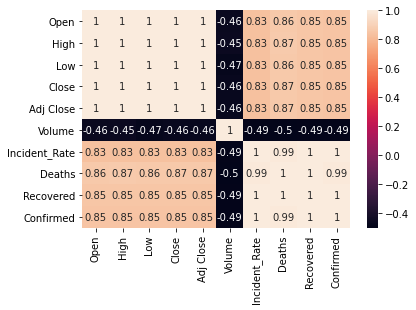

In [34]:
sn.heatmap(corr, annot=True)

In [35]:
data2 = data[['Close','Confirmed']]
data2.head()

,Close,Confirmed
0,11707.900391,3
1,12089.150391,3
2,12137.950195,3
3,12098.349609,3
4,12031.500000,3


In [38]:
train_set =  data2.values
train_set.shape

#print( train_set)

(337, 2)

In [46]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)

print(training_set_scaled[0])

[0.49551965 0.        ]


In [53]:
X_train = []
y_train = []
type(X_train)
for i in range(15, 337):
    X_train.append(training_set_scaled[i-15:i])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
#np.expand_dims(X_train,)
print(X_train.shape)
#X_train = np.reshape(X_train, (X_train.shape[1], X_train.shape[2], 1))
    

X_train[0]
y_train[0]

(322, 15, 2)


0.49196432725789485

In [65]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True,r hinput_shape = (X_train.shape[1],X_train.shape[2])))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [66]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
11/11 [==============================] - 4s 19ms/step - loss: 0.2131
Epoch 2/100
11/11 [==============================] - 0s 23ms/step - loss: 0.0462
Epoch 3/100
11/11 [==============================] - 0s 23ms/step - loss: 0.0219
Epoch 4/100
11/11 [==============================] - 0s 22ms/step - loss: 0.0130
Epoch 5/100
11/11 [==============================] - 0s 23ms/step - loss: 0.0137
Epoch 6/100
11/11 [==============================] - 0s 23ms/step - loss: 0.0126
Epoch 7/100
11/11 [==============================] - 0s 22ms/step - loss: 0.0106
Epoch 8/100
11/11 [==============================] - 0s 23ms/step - loss: 0.0112
Epoch 9/100
11/11 [==============================] - 0s 23ms/step - loss: 0.0099
Epoch 10/100
11/11 [==============================] - 0s 23ms/step - loss: 0.0087
Epoch 11/100
11/11 [==============================] - 0s 23ms/step - loss: 0.0087
Epoch 12/100
11/11 [==============================] - 0s 23ms/step - loss: 0.0086
Epoch 13/100
11/11 [=====

In [63]:
hist = pd.DataFrame(regressor.history.history)
hist['epoch'] = regressor.history.epoch
hist.tail()

,loss,epoch
45,0.004803,45
46,0.005216,46
47,0.004838,47
48,0.005458,48
49,0.004831,49


In [60]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

KeyError: 'val_loss'

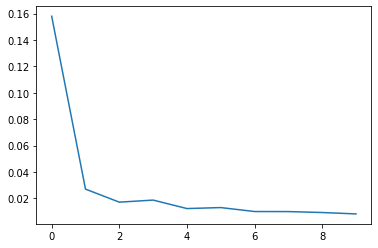

In [61]:
plot_loss(regressor.history)